<a href="https://colab.research.google.com/github/RiyaKhushiRadha/CodSoft-Internship-Projects/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kartik2112/fraud-detection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fraud-detection


In [ ]:
# Load dataset
df = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')
print(df.head())
print(df.info())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


is_fraud
0    553574
1      2145
Name: count, dtype: int64


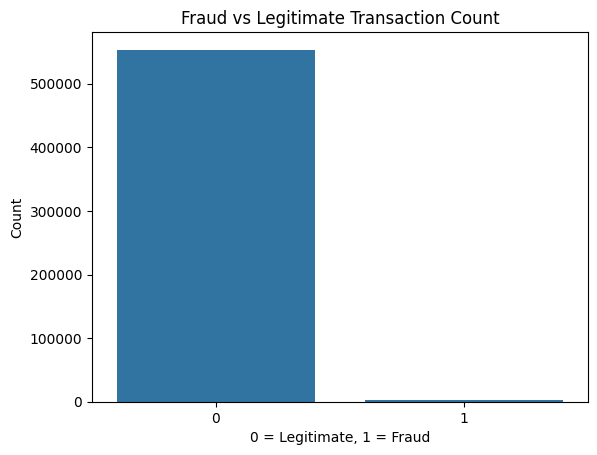

In [ ]:
print(df['is_fraud'].value_counts())  # 0 = legitimate, 1 = fraud
sns.countplot(data=df, x='is_fraud')
plt.title("Fraud vs Legitimate Transaction Count")
plt.xlabel("0 = Legitimate, 1 = Fraud")
plt.ylabel("Count")
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Select numerical features only
df_num = df.select_dtypes(include=[np.number]).drop(['is_fraud'], axis=1)
y = df['is_fraud']

# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

# Split before SMOTE to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:")
print(pd.Series(y_resampled).value_counts())

After SMOTE:
is_fraud
0    387502
1    387502
Name: count, dtype: int64


In [ ]:
# Features and target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Keep only numeric features
X_numeric = X.select_dtypes(include=[np.number])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

In [ ]:
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

--- Logistic Regression ---
[[166031     41]
 [   644      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166072
           1       0.00      0.00      0.00       644

    accuracy                           1.00    166716
   macro avg       0.50      0.50      0.50    166716
weighted avg       0.99      1.00      0.99    166716

Accuracy: 0.9958912162000048


In [ ]:
evaluate_model(y_test, y_pred_dt, "Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

--- Decision Tree ---
[[165663    409]
 [   348    296]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166072
           1       0.42      0.46      0.44       644

    accuracy                           1.00    166716
   macro avg       0.71      0.73      0.72    166716
weighted avg       1.00      1.00      1.00    166716

Accuracy: 0.9954593440341659


In [ ]:
evaluate_model(y_test, y_pred_rf, "Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

--- Random Forest ---
[[166039     33]
 [   333    311]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166072
           1       0.90      0.48      0.63       644

    accuracy                           1.00    166716
   macro avg       0.95      0.74      0.81    166716
weighted avg       1.00      1.00      1.00    166716

Accuracy: 0.9978046498236522
